In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [101]:
df = pd.read_csv(r"C:\Users\nadip\Downloads\archive (1)\Indian_housing_Delhi_data.csv")

In [102]:
df

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,110",Unfurnished


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [104]:
df['numBathrooms'] = df['numBathrooms'].fillna(df['numBathrooms'].mode()[0])
df['numBathrooms'] = df['numBathrooms'].astype(int)
df['house_size'] = df['house_size'].str.replace('sq ft', '').str.replace(',', '').astype(int)
df['house_size']
df['SecurityDeposit'] = (df['SecurityDeposit'].replace('No Deposit', '0').str.strip().str.replace(',', '').astype(float))
print(df['SecurityDeposit'].isnull().sum())  
print(df['SecurityDeposit'].value_counts())  

0
SecurityDeposit
0.0          2224
1010202.0     221
1810202.0      80
1020202.0      70
1010220.0      69
             ... 
1854425.0       1
1052122.0       1
4501105.0       1
4011012.0       1
5401015.0       1
Name: count, Length: 646, dtype: int64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   int32  
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      5000 non-null   int32  
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   float64
 15  Status            5000 non-null   object 
dtypes: float64(5), int32(2), int64(1), object(

In [106]:
# Let us assign X and y variables
X = df[['house_type', 'house_size', 'location', 'city', 'numBathrooms', 'SecurityDeposit', 'Status']]
y = df['price']

In [107]:
X.dtypes

house_type          object
house_size           int32
location            object
city                object
numBathrooms         int32
SecurityDeposit    float64
Status              object
dtype: object

In [108]:
cont_cols = X.select_dtypes(exclude = 'object').columns
cat_cols = X.select_dtypes(include = 'object').columns

In [109]:
cont_cols

Index(['house_size', 'numBathrooms', 'SecurityDeposit'], dtype='object')

In [110]:
cat_cols

Index(['house_type', 'location', 'city', 'Status'], dtype='object')

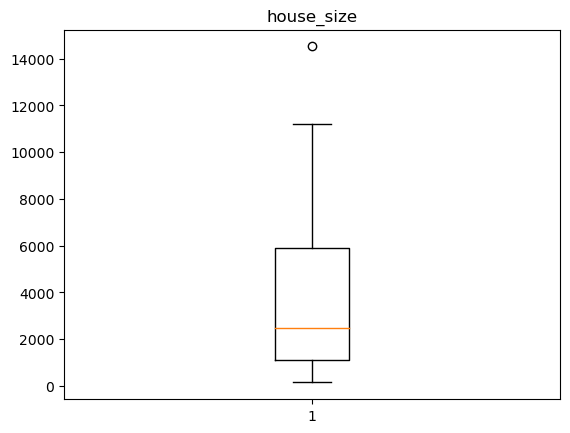

**************************************


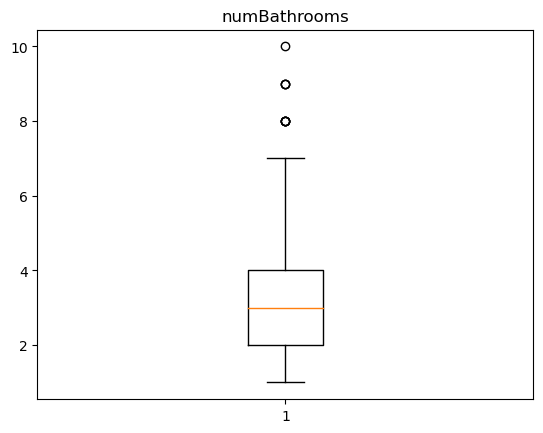

**************************************


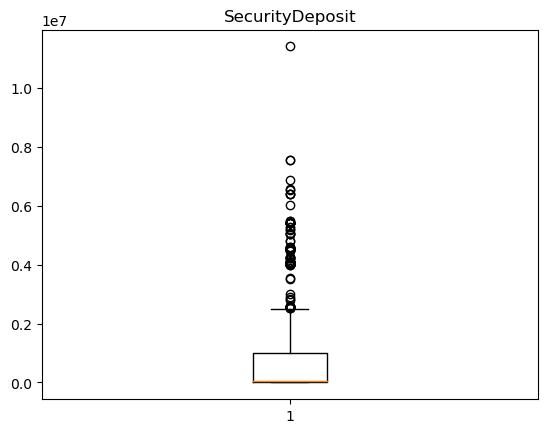

**************************************


In [111]:
for i in cont_cols:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("**************************************")

In [112]:
## Create pipelines for cont_cols, cat_nominal, cat_ordinal

In [113]:
cont_pl = Pipeline(steps=[('Scaling',RobustScaler()),
                         ('Transformation', PowerTransformer(standardize=False))])

cat_nominal_pl = Pipeline(steps = [('OneHotEncoding',OneHotEncoder(drop = 'first',sparse_output = False, handle_unknown='ignore'))])

In [114]:
cat_ordinal_pl = Pipeline(steps = [("Ordinal Encoding",OrdinalEncoder())])

In [115]:
X.columns

Index(['house_type', 'house_size', 'location', 'city', 'numBathrooms',
       'SecurityDeposit', 'Status'],
      dtype='object')

In [116]:
cat_cols[3]

'Status'

In [136]:
ct = ColumnTransformer(transformers=[('Cont Col transform',cont_pl, [1,4,5]),
                                    ('Nominal Col transform',cat_nominal_pl,[0,2,3]),
                                    ('Ordinal Col transform',cat_ordinal_pl,[6])],remainder = 'passthrough')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [121]:
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train),columns = ct.get_feature_names_out(),index = X_train.index)

In [122]:
X_train_transformed

,Cont Col transform__house_size,Cont Col transform__numBathrooms,Cont Col transform__SecurityDeposit,Nominal Col transform__house_type_1 BHK Independent Floor,Nominal Col transform__house_type_1 BHK Independent House,Nominal Col transform__house_type_1 RK Studio Apartment,Nominal Col transform__house_type_10 BHK Independent House,Nominal Col transform__house_type_12 BHK Independent House,Nominal Col transform__house_type_2 BHK Apartment,Nominal Col transform__house_type_2 BHK Independent Floor,...,Nominal Col transform__location_Yojna Vihar,Nominal Col transform__location_Zone L Dwarka,Nominal Col transform__location_dwarka sector 12,Nominal Col transform__location_dwarka sector 17,Nominal Col transform__location_i p extension patparganj,Nominal Col transform__location_laxmi nagar,Nominal Col transform__location_masoodpur,Nominal Col transform__location_mayur vihar phase 1,Nominal Col transform__location_vikaspuri,Ordinal Col transform__Status
1840,-0.590985,-0.954797,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2115,0.492650,0.513258,0.470463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4437,0.070598,0.000000,0.453117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1146,-0.213930,0.513258,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2486,0.070598,0.000000,0.379075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.457559,0.513258,0.379076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
466,-0.446794,-0.487181,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,0.492650,0.513258,0.439348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3772,0.331099,0.513258,0.124098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
X_test_transformed = pd.DataFrame(ct.transform(X_test),columns = ct.get_feature_names_out(),index = X_test.index)

C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [124]:
X_test_transformed

,Cont Col transform__house_size,Cont Col transform__numBathrooms,Cont Col transform__SecurityDeposit,Nominal Col transform__house_type_1 BHK Independent Floor,Nominal Col transform__house_type_1 BHK Independent House,Nominal Col transform__house_type_1 RK Studio Apartment,Nominal Col transform__house_type_10 BHK Independent House,Nominal Col transform__house_type_12 BHK Independent House,Nominal Col transform__house_type_2 BHK Apartment,Nominal Col transform__house_type_2 BHK Independent Floor,...,Nominal Col transform__location_Yojna Vihar,Nominal Col transform__location_Zone L Dwarka,Nominal Col transform__location_dwarka sector 12,Nominal Col transform__location_dwarka sector 17,Nominal Col transform__location_i p extension patparganj,Nominal Col transform__location_laxmi nagar,Nominal Col transform__location_masoodpur,Nominal Col transform__location_mayur vihar phase 1,Nominal Col transform__location_vikaspuri,Ordinal Col transform__Status
1501,-0.561817,-0.954797,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2586,-0.495093,-0.954797,-0.005470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2653,0.553405,0.513258,0.439707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1055,-0.440467,-0.487181,-0.038712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,-0.162084,-0.487181,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,-0.462729,-0.487181,-0.009492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1538,-0.149512,0.000000,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1837,-0.187694,-0.487181,-0.038712,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2380,0.527894,0.513258,0.439348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [125]:
X_train_transformed.shape,X_test_transformed.shape

((3500, 287), (1500, 287))

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [127]:
rfr = RandomForestRegressor()
rfr.fit(X_train_transformed,y_train)
y_pred = rfr.predict(X_test_transformed)
mae_rfr = mean_absolute_error(y_test,y_pred)
mse_rfr = mean_squared_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
mae_rfr,mse_rfr,r_score

(23150.850495951952, 2120719862.6386485, 0.9688638329439234)

In [137]:
final_pl = Pipeline(steps = [('Preprocessing',ct),
                             ('Estimator',rfr)])

In [138]:
final_pl.fit(X_train,y_train)
y_pred_pl = final_pl.predict(X_test)

C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [139]:
final_pl[0].get_feature_names_out()

array(['Cont Col transform__house_size',
       'Cont Col transform__numBathrooms',
       'Cont Col transform__SecurityDeposit',
       'Nominal Col transform__house_type_1 BHK Independent Floor ',
       'Nominal Col transform__house_type_1 BHK Independent House ',
       'Nominal Col transform__house_type_1 RK Studio Apartment ',
       'Nominal Col transform__house_type_10 BHK Independent House ',
       'Nominal Col transform__house_type_12 BHK Independent House ',
       'Nominal Col transform__house_type_2 BHK Apartment ',
       'Nominal Col transform__house_type_2 BHK Independent Floor ',
       'Nominal Col transform__house_type_2 BHK Independent House ',
       'Nominal Col transform__house_type_3 BHK Apartment ',
       'Nominal Col transform__house_type_3 BHK Independent Floor ',
       'Nominal Col transform__house_type_3 BHK Independent House ',
       'Nominal Col transform__house_type_4 BHK Apartment ',
       'Nominal Col transform__house_type_4 BHK Independent Floor 

In [140]:
import pickle
pickle.dump(final_pl,open('rfr.pkl','wb'))

In [141]:
pr = pickle.load(open('rfr.pkl','rb'))

In [142]:
pr

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cont Col transform',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [1, 4, 5]),
                                                 ('Nominal Col transform',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 2, 3]),
                                                 ('Ordinal Col transform',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  [6])])),
                ('Estimator', RandomForestRegressor())])

In [143]:
pr.predict([['1 RK Studio Apartment', 400, 'ManSarovar Garden', 'Delhi', 1.0, 0.0, 'Furnished']])

C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\nadip\anaconda3\Newfolder7\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([16868.07238095])

In [82]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0.0,Furnished
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0.0,Furnished
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0.0,Semi-Furnished
3,3 BHK Independent House,1020,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0.0,Furnished
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0.0,Unfurnished
